In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI'] # FWI as uotput feature

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [16]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

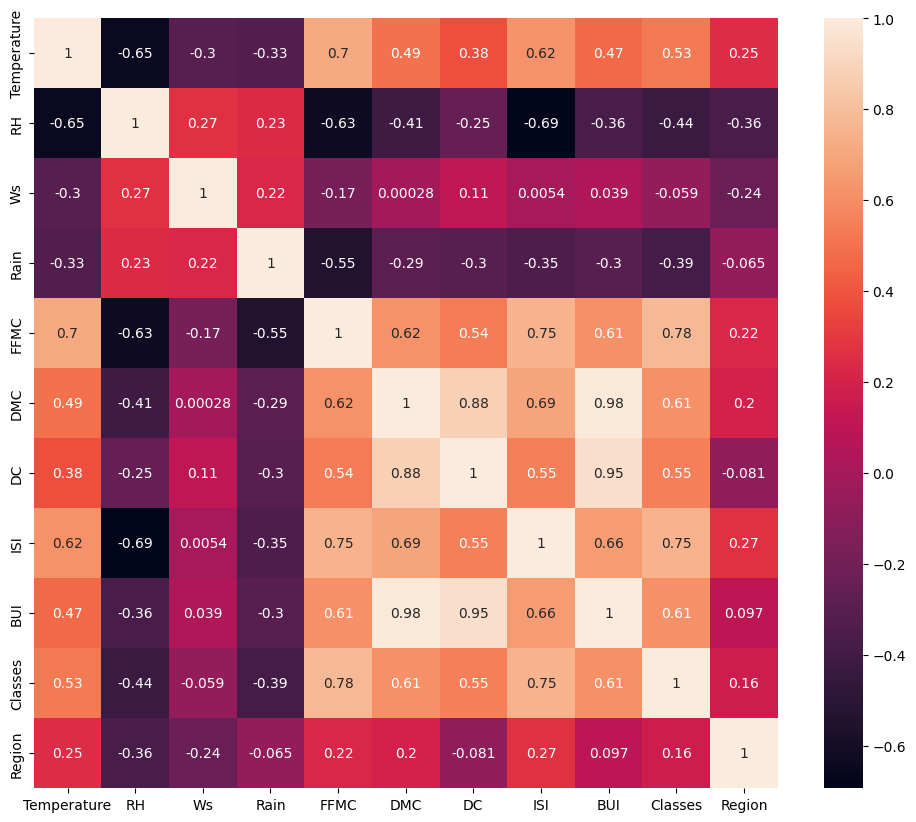

In [17]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling Or Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]], shape=(181, 9))

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

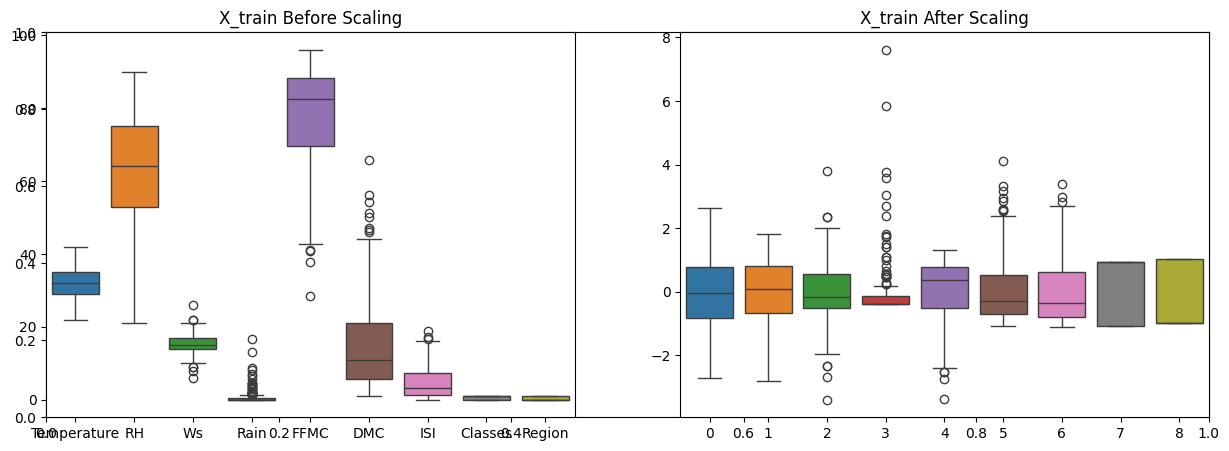

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

Mean absolute error 0.5838063599546971
R2 Score 0.983523052949508


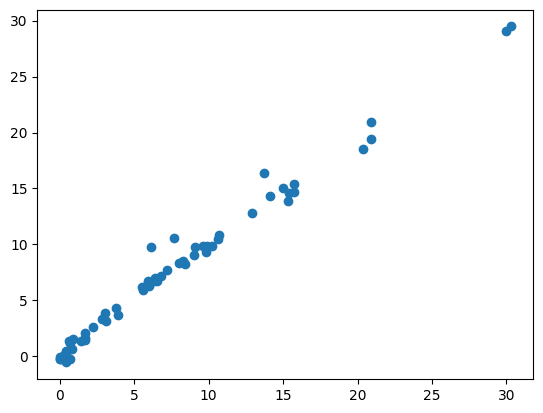

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error 1.1459979969391685
R2 Score 0.9497712193501188


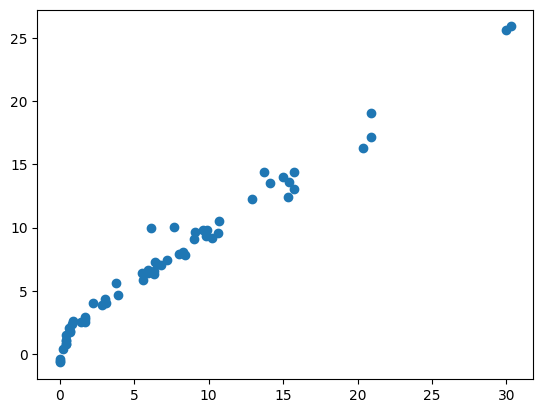

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Cross Validation Lasso

In [28]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


Mean absolute error 0.6701641696301907
R2 Score 0.9808648686248684


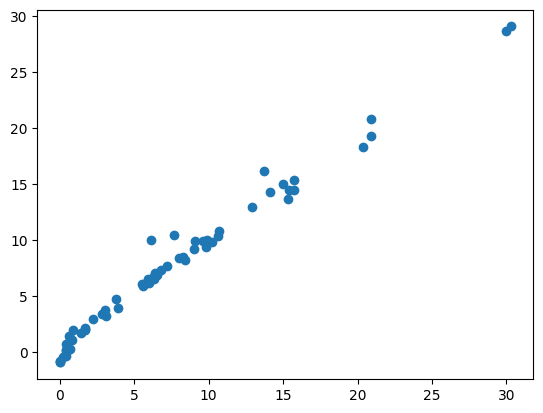

In [29]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression model

Mean absolute error 0.612551563810103
R2 Score 0.9826983552292979


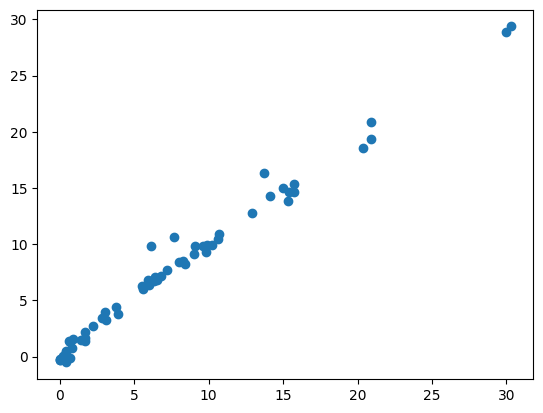

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.8566908888843284
R2 Score 0.9729928114396738


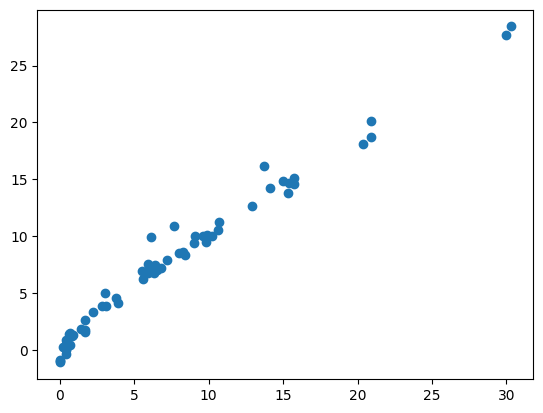

In [31]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [32]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

## Elasticnet Regression

Mean absolute error 1.8915134363047041
R2 Score 0.8731354681001338


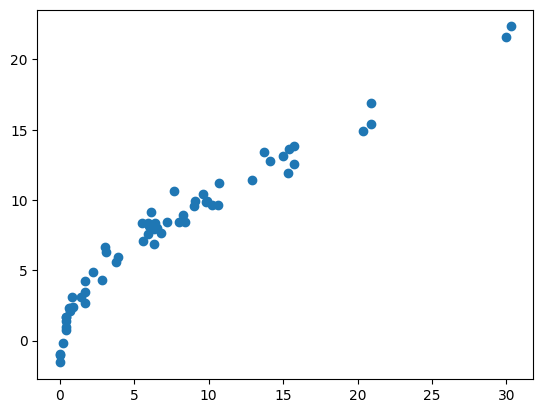

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7295307419548667
R2 Score 0.9789324233433637


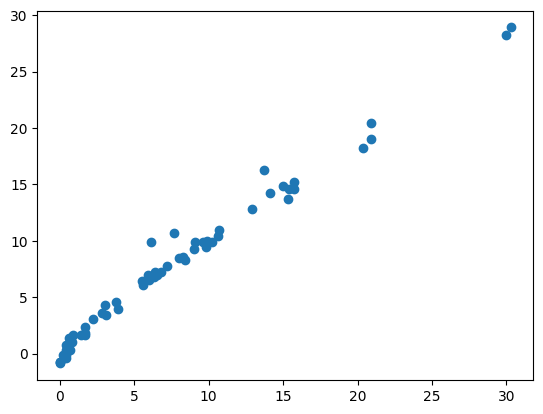

In [34]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [35]:
elasticcv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

In [36]:
#pickle the ml models, preprocessing model standardscaler

In [37]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [38]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [39]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))